# Part 1: Data from a mysterious celltype

Your collaborators performed ChIP-seq for two different factors in a mysterious new cell type.

They send you a file with DNA sequences and the matched profiles for a set of regions.

They believe there is an interaction between the two factors, but would like your help modeling and analyzing the data. 

Try to answer their questions concisely.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import io
import h5py

In [ ]:
def download_h5(dataset_url, filename = 'dataset.h5'):
  with requests.Session() as session:
      r = session.get(dataset_url, stream=True)
      r.raise_for_status()
      with open(filename, 'wb') as hd5:
          for chunk in r.iter_content(chunk_size=io.DEFAULT_BUFFER_SIZE):
              hd5.write(chunk)

In [ ]:
DATA_URL = 'https://raw.githubusercontent.com/Fudenberg-Research-Group/2022_seq-to-profile/main/dataset1.h5'

download_h5(DATA_URL, filename = 'dataset1.h5')

In [ ]:
### reading in the h5 data 
with  h5py.File('dataset1.h5', 'r') as h:
    sequences = h['seqs'].asstr()[()]
    targets = h['targets'][()]

Text(0.5, 0, 'position, bp')

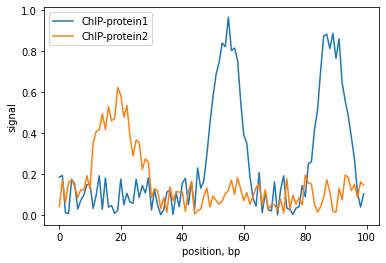

In [ ]:
## To take a quick look at one of their profiles
plt.plot( targets[0,:,0], label='ChIP-protein1');

plt.plot( targets[0,:,1], label='ChIP-protein2');
plt.legend()
plt.ylabel("signal")
plt.xlabel("position, bp")

## 1.0 Try to fit the data with a seq-to-profile neural network. 
- Follow similar steps to those taken in the [Zou et al primer](https://colab.research.google.com/drive/17E4h5aAOioh5DiTo7MZg4hpL6Z_0FyWr#scrollTo=qSOUwoG_vHRA), e.g.: 
  - one-hot encode the DNA, 
  - set aside a test set, 
  - define a convolutional architecture, perhaps with additional or modified layers
  - consider what sort of loss function and activation to use. 
- Use [EarlyStopping](https://keras.io/api/callbacks/early_stopping/)
- Report your test set accuracy. Report an interpretable metric as well. 
- Where does the model do well or struggle? 


Note: if the validation loss is not decreasing during training, the specified model may not be well-matched for the problem at hand. Consider how to modify the model (e.g. a model with sigmoid activation at the final layer would never be able to learn negative values).

## 1.1 Can you determine any rule(s) that influence the profiles for the two factors?
Try saliency mapping as employed in the primer. Are there motifs, or an interplay between motifs, that boost or dampen the profiles? 

#Part 2: More data from another mysterious cell type

Your collaborators send you an update: they performed ChIP-seq for the same two factors in a yet another mysterious cell type and are getting puzzling results. They send you a second file. Seems like they are pretty good collaborators!

In [ ]:
DATA_URL2 = 'https://raw.githubusercontent.com/Fudenberg-Research-Group/2022_seq-to-profile/main/dataset2.h5'


## 2.0 Does your model trained on the original data predict this data well or poorly? 

## 2.1 Does a model re-trained on this new dataset reach the same level of predictive ability?

## 2.2 Can you determine different rule(s) for the influence on the profiles in this new cell type?

# Notes from the office hour 12/08
- We'd want to plot our predictions after training
- For saliency mapping, try debugging with two things in the repo (https://github.com/keras-team/keras/issues/16066, feriels' suggestion). If those dont work, try to explain the question "how you'd do it" even if you cant do it
- Q: Going from max-pooling layer (32) to dense layer (16), what does this mean? is it arbitrary? A: hyper-parameters of the problem. If this project was for a paper, we'd like the optimize those numbers, but here for the homework, no particular reason for the numbers. Data we have is simple, we dont need huge layers. 
- Q: 2nd question. It works worse on the new data, we reach to the same model? A: Correct.
- Q: What does Q1.1 mean? A: There is a positive/negative interactions, those are potential rules. Anytime we have binding on one thing, not binding on other thing... Try to extract data to make rules.
- Q: Do we create 2 salency maps for each? A: Yeah, it would be more interpretable. Look at the impact of input 1 and input 2 seperately. At least 2 different maps would be good.
- He will look into the error at salency map, let us know.